In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
#import dataset
df = pd.read_csv('data/data_set_A.csv')

#vew dataset
df.head()

,0,1
0,-1.534076,5.169982
1,1.452231,2.699340
2,0.861024,2.281911
3,1.546562,1.711730
4,3.088828,0.481944


In [3]:
#convert them to numpy arrays
x = df.values

#viiew the shape of the dataset
x.shape

(250, 2)

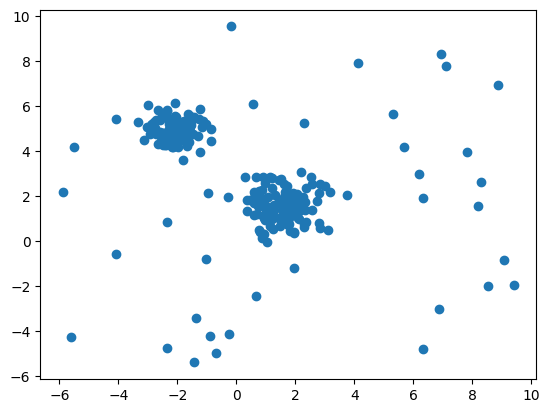

In [4]:
#plot the dataset
plt.scatter(x[:,0], x[:,1])

In [12]:
#define neighbours
nbrs = NearestNeighbors(n_neighbors = 5)

#fit the dataset
nbrs.fit(x)

NearestNeighbors()

In [13]:
#assign the neighbours to variables
distances, indices = nbrs.kneighbors(x)

#view the distances
distances

array([[0.        , 0.0829951 , 0.12113547, 0.15227371, 0.17672986],
       [0.        , 0.07493768, 0.23445492, 0.27389498, 0.33677057],
       [0.        , 0.11891007, 0.23259311, 0.27085043, 0.29036663],
       ...,
       [0.        , 1.44833534, 1.55409781, 1.56461387, 1.61581551],
       [0.        , 0.85156381, 1.10251358, 1.28527883, 1.72761841],
       [0.        , 0.59666731, 0.83665398, 0.95014126, 1.03253704]])

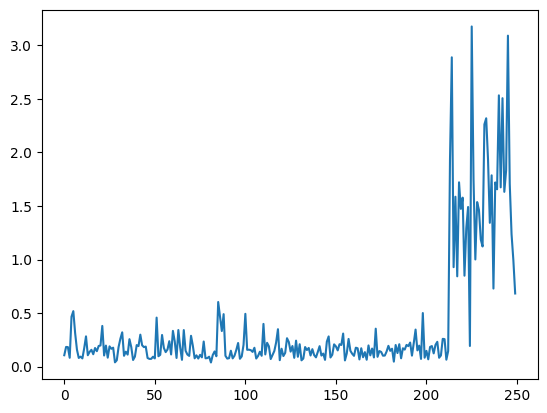

In [14]:
#plot the mean distances
plt.plot(distances.mean(axis=1))

In [15]:
#get neighbours where mean distance is greater than 0.5
anomaly_index = np.where(distances.mean(axis=1) > 0.5)

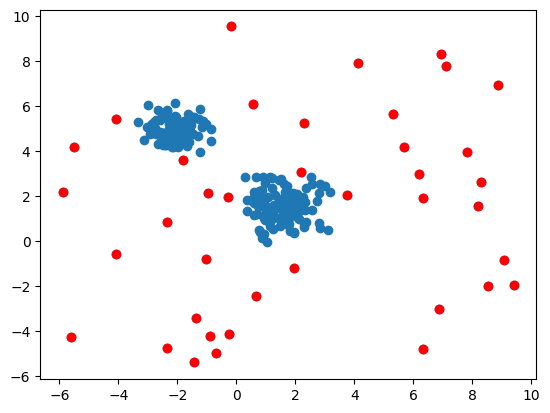

In [16]:
#plot the data points
plt.scatter(x[:,0], x[:,1])

#plot the anomalies
plt.scatter(x[anomaly_index,0], x[anomaly_index,1], color='r')

Unsupervised KNN Anomaly Detection

In [17]:
#read the dataset
df = pd.read_csv('data/sensors.csv', index_col = 'time')

#view the dataset
df.head()

,sensor1,sensor2,sensor3
time,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405
2020-04-01 00:01:00,2.258430,1.054156,11.453157
2020-04-01 00:02:00,4.834818,0.284641,10.082687
2020-04-01 00:03:00,5.058023,0.845871,9.870637
2020-04-01 00:04:00,6.888020,-2.019289,9.265985


In [18]:
#convert the index to datetime
df.index = pd.to_datetime(df.index)

#confirm the index type
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [19]:
#conver the dataframe to numpy array
x = df.values

In [20]:
#create the neighbour object
nbrs = NearestNeighbors(n_neighbors = 5 
, algorithm = 'ball_tree')

#fit the dataset
nbrs.fit(x)

#assign the neighbours to variables
distances, indices = nbrs.kneighbors(x)

In [21]:
#create a health column in the dataset
df['health'] = distances.mean(axis=1)

#view the dataset
df.head()

,sensor1,sensor2,sensor3,health
time,,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405,0.645349
2020-04-01 00:01:00,2.258430,1.054156,11.453157,0.157926
2020-04-01 00:02:00,4.834818,0.284641,10.082687,0.132181
2020-04-01 00:03:00,5.058023,0.845871,9.870637,0.171847
2020-04-01 00:04:00,6.888020,-2.019289,9.265985,0.241536


<AxesSubplot: xlabel='time'>

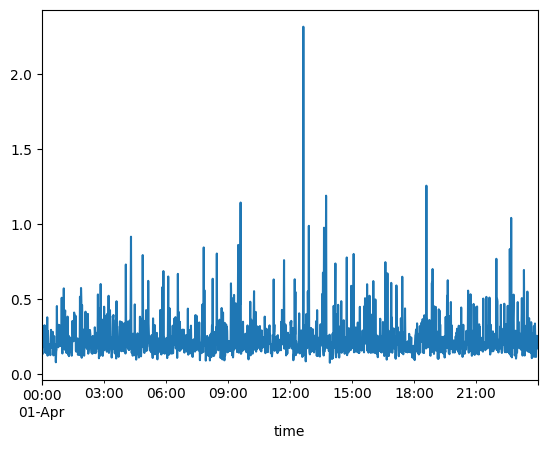

In [22]:
#plot the health column
df['health'].plot()

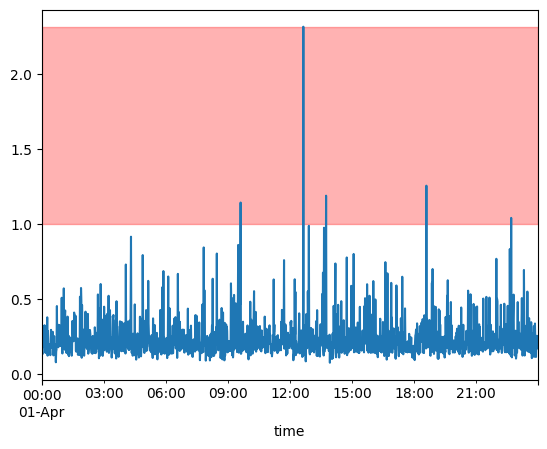

In [27]:
#plot the health column
df['health'].plot()

#plot a horizontal span threshold to identfy anomalies
# plt.axhspan(1, 0.55, alpha=0.3, color='red')
plt.axhspan(1, max(df['health']), alpha=0.3, color='red')